<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab-07/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [31]:

import tensorflow as tf
import seaborn as sns
import pandas as pd

#Importing kerad library from Tesnorflow for Deep CNN models. 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

### Training the convnet on MNIST images

In [34]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [35]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

#### compile and fit model 

In [36]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.4591 - acc: 0.8514 - val_loss: 0.0642 - val_acc: 0.9818
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0561 - acc: 0.9824 - val_loss: 0.0474 - val_acc: 0.9856
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0391 - acc: 0.9884 - val_loss: 0.0384 - val_acc: 0.9880
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0431 - val_acc: 0.9886
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0185 - acc: 0.9947 - val_loss: 0.0394 - val_acc: 0.9893


#### evaluate model

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0346 - acc: 0.9898


0.989799976348877

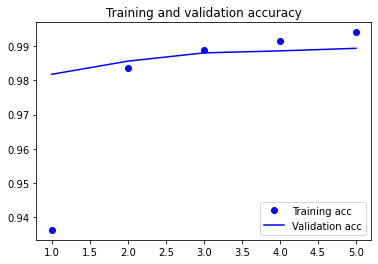

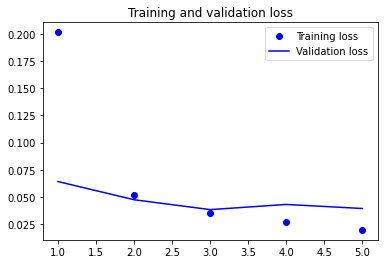

In [38]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
# Write code here
def create_model(Optimizer,Activation_func):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation=Activation_func))
  model.compile(optimizer=Optimizer, 
              loss='categorical_crossentropy',
              metrics=['acc'])
  return model

In [41]:
model_grid = KerasClassifier(build_fn=create_model, verbose=10)

In [42]:
optimizer = ["adam","rmsprop"]
activation_func = ["softmax","sigmoid"]
epochs = [5]
param_grid = dict(Optimizer = optimizer, Activation_func=activation_func,epochs=epochs)

In [43]:
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=3)
grid_result = grid.fit(train_images, train_labels, batch_size=128, validation_split=0.2)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [44]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987833 using {'Activation_func': 'sigmoid', 'Optimizer': 'rmsprop', 'epochs': 5}
0.982833 (0.000225) with: {'Activation_func': 'softmax', 'Optimizer': 'adam', 'epochs': 5}
0.984367 (0.004506) with: {'Activation_func': 'softmax', 'Optimizer': 'rmsprop', 'epochs': 5}
0.984717 (0.000425) with: {'Activation_func': 'sigmoid', 'Optimizer': 'adam', 'epochs': 5}
0.987833 (0.000887) with: {'Activation_func': 'sigmoid', 'Optimizer': 'rmsprop', 'epochs': 5}


In [45]:
predictions = grid.best_estimator_.predict(test_images)
y_pred = predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
from sklearn.metrics import accuracy_score, f1_score

In [47]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
accuracy_score(predictions,test_labels)

0.9891